Digit Recoginition 

In [10]:
import pandas as pd
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
# Lin Reg
from sklearn.linear_model import LinearRegression
# Tree
from sklearn.tree import DecisionTreeClassifier
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# Support Vector Machine
from sklearn.svm import SVC
# KNN
from sklearn.neighbors import KNeighborsClassifier
# Log Reg
from sklearn.linear_model import LogisticRegression
# GridSearchCV for optimization
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
%matplotlib inline

In [33]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [12]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


EDA

In [14]:
train.dtypes

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 785, dtype: object

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


Data Cleaning and Preprocessing

In [16]:
def plotConfusionMatrix(y, ypred):
    CM = confusion_matrix(y, ypred)
    plt.figure(figsize=(15,15))
    sns.heatmap(CM, annot=True)
    plt.show()


In [17]:
X = train.drop('label', axis = 1)

pca = PCA(n_components=100).fit(X)
pcaXTrain = pca.transform(X)
pcaXTest = pca.transform(test)


In [18]:
pcaYTrain = train['label']
print(pcaXTrain.shape, pcaYTrain.shape)
print(pcaXTest.shape)


(42000, 100) (42000,)
(28000, 100)


In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(pcaXTrain, pcaYTrain, test_size = 0.2)
print("Train: ", X_train.shape, Y_train.shape)
print("Test: ", X_test.shape, Y_test.shape)


Train:  (33600, 100) (33600,)
Test:  (8400, 100) (8400,)


In [20]:
params = {'kernel': ['poly'], 'degree' : [2, 3, 4, 5]}
svm = SVC()
svmCV = GridSearchCV(svm, params, cv=2)
svmCV.fit(X_train, Y_train)


GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'degree': [2, 3, 4, 5], 'kernel': ['poly']})

In [21]:
print("Best params",svmCV.best_params_)
print("Accuracy :",svmCV.best_score_)
optiparams = svmCV.best_params_


Best params {'degree': 3, 'kernel': 'poly'}
Accuracy : 0.975


In [22]:
svm = SVC(kernel = optiparams['kernel'], degree = optiparams['degree'])
svm.fit(X_train, Y_train)
acc = svm.score(X_test, Y_test)
print(acc)

0.9801190476190477


Train -> Test data 

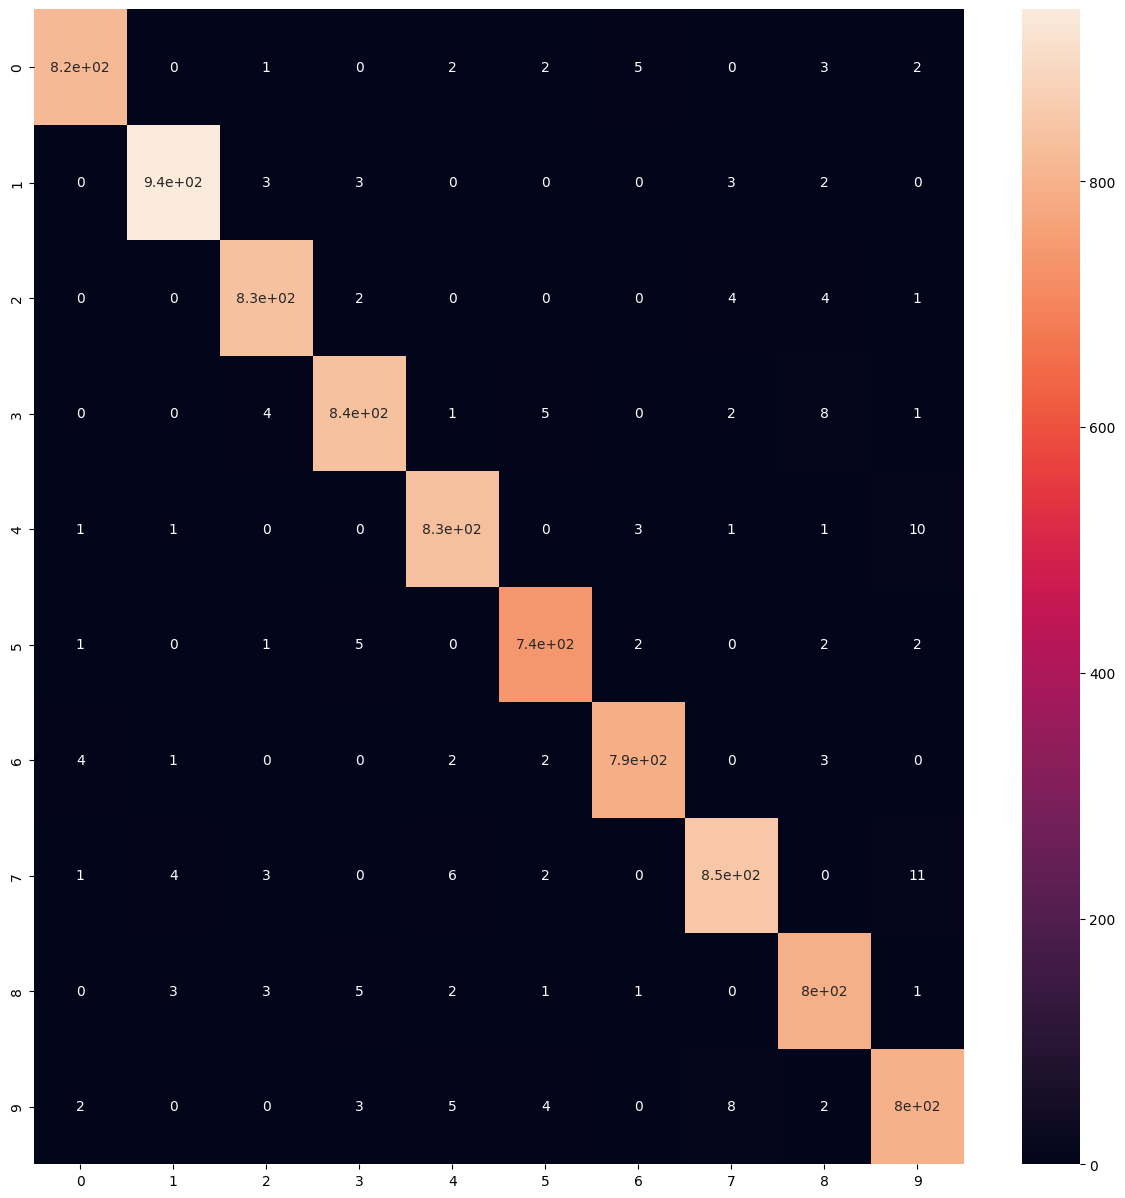

In [23]:
yhat = svm.predict(X_test)
plotConfusionMatrix(Y_test, yhat)

In [24]:
NN = Sequential()
NN.add(Dense (10, activation = 'sigmoid'))
NN.add(Dense (10, activation = 'sigmoid'))
NN.add(Dense (1, activation = 'relu'))
NN.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
NN.fit(X_train, Y_train, epochs = 150, batch_size=300)
acc = NN.evaluate(X_test, Y_test)
print(acc)

Epoch 1/150
112/112 [==============================] - 1s 2ms/step - loss: -41.3598 - accuracy: 0.1109
Epoch 2/150
112/112 [==============================] - 0s 2ms/step - loss: -52.5683 - accuracy: 0.1111
Epoch 3/150
112/112 [==============================] - 0s 2ms/step - loss: -52.7499 - accuracy: 0.1111
Epoch 4/150
112/112 [==============================] - 0s 2ms/step - loss: -52.7990 - accuracy: 0.1111
Epoch 5/150
112/112 [==============================] - 0s 2ms/step - loss: -52.7991 - accuracy: 0.1111
Epoch 6/150
112/112 [==============================] - 0s 2ms/step - loss: -52.7991 - accuracy: 0.1111
Epoch 7/150
112/112 [==============================] - 0s 2ms/step - loss: -52.8013 - accuracy: 0.1111
Epoch 8/150
112/112 [==============================] - 0s 2ms/step - loss: -52.8014 - accuracy: 0.1111
Epoch 9/150
112/112 [==============================] - 0s 2ms/step - loss: -52.8014 - accuracy: 0.1111
Epoch 10/150
112/112 [==============================] - 0s 2ms/step - los

Actual Test Data

In [25]:
res = svm.predict(pcaXTest)
res

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [59]:
import tensorflow as tf
from tensorflow import keras
import numpy
import pandas as pd 
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
X = train.drop('label', axis = 1)
Y = train['label']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
print("Train: ", X_train.shape, Y_train.shape)
print("Test: ", X_test.shape, Y_test.shape)

#mnist = keras.datasets.mnist
#(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Train:  (33600, 784) (33600,)
Test:  (8400, 784) (8400,)


In [48]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [60]:
X_train = X_train / 255.0
Y_train = Y_train / 255.0

In [61]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(784, )),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [62]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [63]:


# Train the model
model.fit(X_train, Y_train, epochs=10, batch_size=32)

Epoch 1/10
1050/1050 [==============================] - 3s 2ms/step - loss: 0.0056 - accuracy: 0.0987
Epoch 2/10
1050/1050 [==============================] - 2s 2ms/step - loss: 2.2472e-06 - accuracy: 0.0987
Epoch 3/10
1050/1050 [==============================] - 3s 2ms/step - loss: 6.6465e-07 - accuracy: 0.0987
Epoch 4/10
1050/1050 [==============================] - 3s 2ms/step - loss: 2.8340e-07 - accuracy: 0.0987
Epoch 5/10
1050/1050 [==============================] - 3s 2ms/step - loss: 1.4130e-07 - accuracy: 0.0987
Epoch 6/10
1050/1050 [==============================] - 2s 2ms/step - loss: 7.4803e-08 - accuracy: 0.0987
Epoch 7/10
1050/1050 [==============================] - 2s 2ms/step - loss: 4.0218e-08 - accuracy: 0.0987
Epoch 8/10
1050/1050 [==============================] - 3s 2ms/step - loss: 2.2614e-08 - accuracy: 0.0987
Epoch 9/10
1050/1050 [==============================] - 3s 2ms/step - loss: 1.2889e-08 - accuracy: 0.0987
Epoch 10/10
1050/1050 [===========================

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0986 - accuracy: 0.9738
Test accuracy: 0.973800003528595


In [ ]:
print(train_images)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd 

# Load the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Split the data into input and target variables
X = train.drop('label', axis = 1)
Y = train['label']
X_val = test.drop('label', axis = 1)
Y_val = test['label']

# Split the data into training and validation sets
# X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.2)

# Preprocess the data
X_train = np.array(X_train) / 255.0
X_val = np.array(X_val) / 255.0
X_train = X_train.reshape(-1, 28, 28, 1)
X_val = X_val.reshape(-1, 28, 28, 1)

# Define the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28, 1)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X, Y, epochs=5, batch_size=32, validation_data=(X_val, Y_val))

# Evaluate the model on the test set
# X_test = np.array(test) / 255.0
# X_test = X_test.reshape(-1, 28, 28, 1)
test_loss, test_acc = model.evaluate(X_val, verbose=2)
print("Test accuracy:", test_acc)

KeyError: "['label'] not found in axis"